# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [119]:

import numpy as np
import pandas as pd
import os
import scipy.io 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [120]:
data = scipy.io.loadmat("./data/ejer_1_data1.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Create a DataFrame with the features and target

In [121]:
dicc = {
    'Feature 1': data['X'][:, 0], 
    'Feature 2': data['X'][:, 1],  
    'Target (y)': data['y'].flatten() 
}

In [122]:
df = pd.DataFrame(dicc)
df

,Feature 1,Feature 2,Target (y)
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


#### 4. Plot a scatterplot with the data

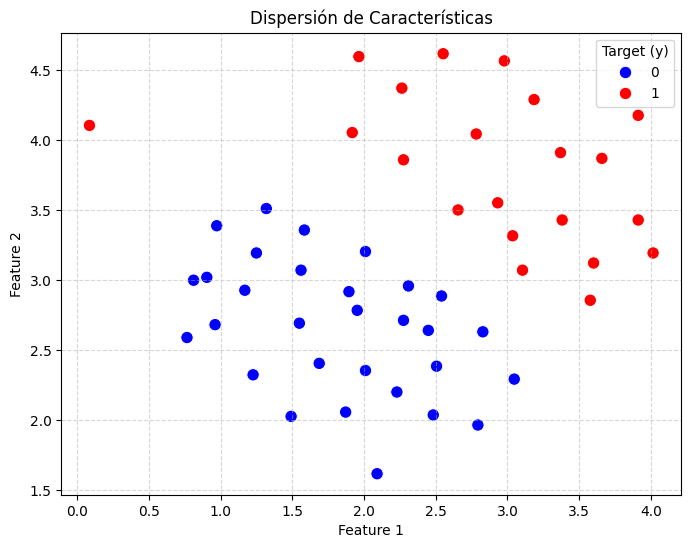

In [123]:


plt.figure(figsize=(8, 6))


sns.scatterplot(
    x='Feature 1', 
    y='Feature 2', 
    hue='Target (y)', # Colorea por la columna 'Target (y)'
    data=df, 
    palette=['blue', 'red'], # Define los colores
    s=80 # Tamaño del punto
)

plt.title('Dispersión de Características')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
plt.show()

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [124]:

X = df[["Feature 1","Feature 2"]]  
y = df["Target (y)"]  

modelo1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC( C = 1,
                              loss='hinge',
                              max_iter=1000,
                              random_state=42))
])

modelo1.fit(X, y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [125]:
performance = modelo.score(X,y)
print(performance)

1.0


It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [126]:
modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC( C = 2,
                              loss='hinge',
                              max_iter=1000,
                              random_state=42))
])

modelo.fit(X, y)
performance = modelo.score(X,y)
print(performance)

0.9803921568627451


In [127]:
modelo = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC( C = 15,
                              loss='hinge',
                              max_iter=1000,
                              random_state=42))
])

modelo.fit(X, y)
performance = modelo.score(X,y)
print(performance)

1.0


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [128]:
y_decision = modelo1.decision_function(X)
y_decision

array([ 2.62283759,  1.24547709,  4.01279025,  1.43372315,  0.64099392,
        2.11138727,  1.77899587,  4.39748773,  2.43514965,  3.52312423,
        2.95494994,  0.49084457,  1.21145197,  2.49770193,  0.90722628,
        3.62752962,  3.2700884 ,  2.5451665 ,  1.33409206,  0.99994392,
       -0.99722536, -0.76187116, -1.88562759, -1.59673254, -0.9374477 ,
       -0.99999999, -1.52098878, -2.9716336 , -2.07544965, -3.80390109,
       -2.86786369, -4.07669052, -1.6388647 , -1.74130153, -2.6967361 ,
       -3.2074476 , -4.42950204, -3.57173   , -2.66299004, -3.00176788,
       -1.80420011, -1.88646476, -1.        , -2.93223994, -1.52428539,
       -2.69961411, -4.57845781, -0.78211055, -2.81737654, -4.08328372,
       -1.31038804])

c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


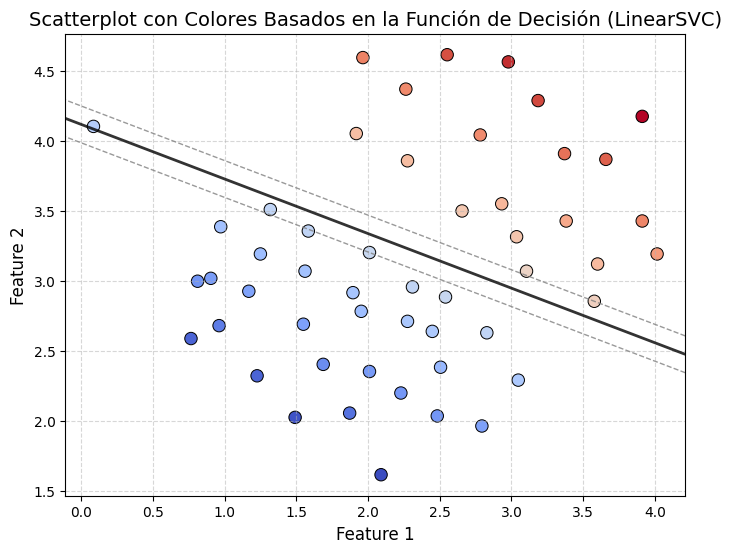

In [166]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 1. Scatter plot coloreado por la función de decisión (y_decision)
# Usamos el argumento 'c' y 'cmap' directamente en sns.scatterplot
sns.scatterplot(
    x='Feature 1',
    y='Feature 2',
    c=y_decision,
    data=df,
    edgecolors="k",
    s=80,
    cmap='coolwarm', # Mapa de color divergente (rojo/azul)
    ax=ax
)

# 2. CÁLCULO Y TRAZADO DE HIPERPLANO Y MÁRGENES
linear_svc_model = modelo.named_steps["linear_svc"]
scaler = modelo.named_steps["scaler"]
w = linear_svc_model.coef_[0]
b = linear_svc_model.intercept_[0]

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

xy_scaled = scaler.transform(xy)
Z = (np.dot(xy_scaled, w) + b).reshape(XX.shape)

ax.contour(
    XX, YY, Z,
    colors=['gray', 'black', 'gray'],
    levels=[-1, 0, 1],
    alpha=0.8,
    linestyles=['--', '-', '--'],
    linewidths=[1, 2, 1]
)

# 3. Configuración Final del Gráfico
plt.title('Scatterplot con Colores Basados en la Función de Decisión (LinearSVC)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

In [158]:
X_3 = df[["Feature 1","Feature 2"]]  
y_3 = df["Target (y)"]  

modelo3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC( C = 1,
                kernel = "rbf",
                degree = 3,
                coef0=1
                              ))
])

In [159]:
modelo3.fit(X,y)

,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [160]:
performance = modelo3.score(X,y)
print(performance)

1.0


In [150]:
y_decision3 = modelo1.decision_function(X)
y_decision3

array([ 2.62283759,  1.24547709,  4.01279025,  1.43372315,  0.64099392,
        2.11138727,  1.77899587,  4.39748773,  2.43514965,  3.52312423,
        2.95494994,  0.49084457,  1.21145197,  2.49770193,  0.90722628,
        3.62752962,  3.2700884 ,  2.5451665 ,  1.33409206,  0.99994392,
       -0.99722536, -0.76187116, -1.88562759, -1.59673254, -0.9374477 ,
       -0.99999999, -1.52098878, -2.9716336 , -2.07544965, -3.80390109,
       -2.86786369, -4.07669052, -1.6388647 , -1.74130153, -2.6967361 ,
       -3.2074476 , -4.42950204, -3.57173   , -2.66299004, -3.00176788,
       -1.80420011, -1.88646476, -1.        , -2.93223994, -1.52428539,
       -2.69961411, -4.57845781, -0.78211055, -2.81737654, -4.08328372,
       -1.31038804])

c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


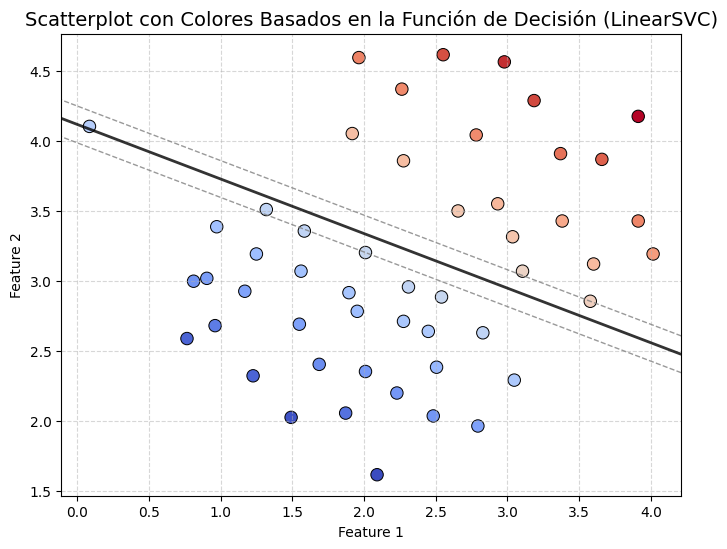

In [167]:
plt.figure(figsize=(8, 6))
ax = plt.gca() # Añadir esta línea es CRUCIAL para obtener los ejes

sns.scatterplot(
    x='Feature 1', 
    y='Feature 2', 
    c=y_decision3, # Colores basados en decision function
    data=df, 
    edgecolors = "k", 
    s=80,
    cmap='coolwarm', # Recomendado usar un cmap divergente
    ax=ax
)

# ------------------------------------------------------------------
# CÓDIGO INSERTADO PARA LAS LÍNEAS DE MARGEN
# ------------------------------------------------------------------
linear_svc_model = modelo.named_steps["linear_svc"]
scaler = modelo.named_steps["scaler"]
w = linear_svc_model.coef_[0]
b = linear_svc_model.intercept_[0]

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

xy_scaled = scaler.transform(xy)
Z = (np.dot(xy_scaled, w) + b).reshape(XX.shape)

ax.contour(
    XX, YY, Z,
    colors=['gray', 'black', 'gray'],
    levels=[-1, 0, 1], 
    alpha=0.8,
    linestyles=['--', '-', '--'],
    linewidths=[1, 2, 1]
)
# ------------------------------------------------------------------

plt.title('Scatterplot con Colores Basados en la Función de Decisión (LinearSVC)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [130]:
data2 = scipy.io.loadmat("./data/ejer_1_data2.mat")
data2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]], shape=(863, 2)),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
    

#### 2. Create a DataFrame with the features and target

In [131]:
dicc2 = {
    'Feature 1': data2['X'][:, 0], 
    'Feature 2': data2['X'][:, 1],  
    'Target (y)': data2['y'].flatten() 
}

In [132]:
df2 = pd.DataFrame(dicc2)
df2

,Feature 1,Feature 2,Target (y)
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

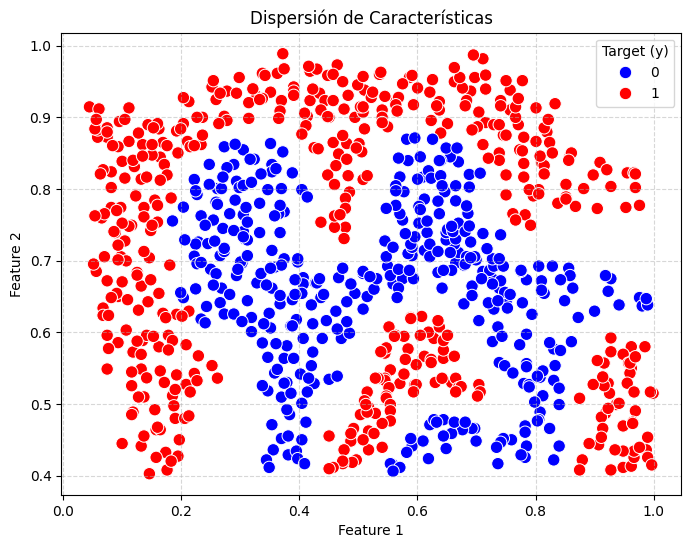

In [133]:
plt.figure(figsize=(8, 6))


sns.scatterplot(
    x='Feature 1', 
    y='Feature 2', 
    hue='Target (y)', # Colorea por la columna 'Target (y)'
    data=df2, 
    palette=['blue', 'red'], # Define los colores
    s=80 # Tamaño del punto
)

plt.title('Dispersión de Características')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
plt.show()

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [134]:
X_2 = df2[["Feature 1","Feature 2"]]  
y_2 = df2["Target (y)"]  

In [135]:


modelo2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC( C = 100,
                              gamma=10,
                              probability=True
                              ))
])



#### 5. Fit the classifier and get the score

In [136]:
modelo2.fit(X_2, y_2)

,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,100
,kernel,'rbf'
,degree,3
,gamma,10


In [137]:
performance_2 = modelo2.score(X_2,y_2)
performance_2

1.0

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [138]:
prob = modelo2.predict_proba(X_2) #con predict_proba sacamos las probabilidades de ser clase 0 o 1
prob

array([[2.59742116e-10, 1.00000000e+00],
       [8.91803481e-06, 9.99991082e-01],
       [3.29063632e-10, 1.00000000e+00],
       ...,
       [4.09958495e-03, 9.95900415e-01],
       [6.83141203e-03, 9.93168588e-01],
       [1.02344597e-02, 9.89765540e-01]], shape=(863, 2))

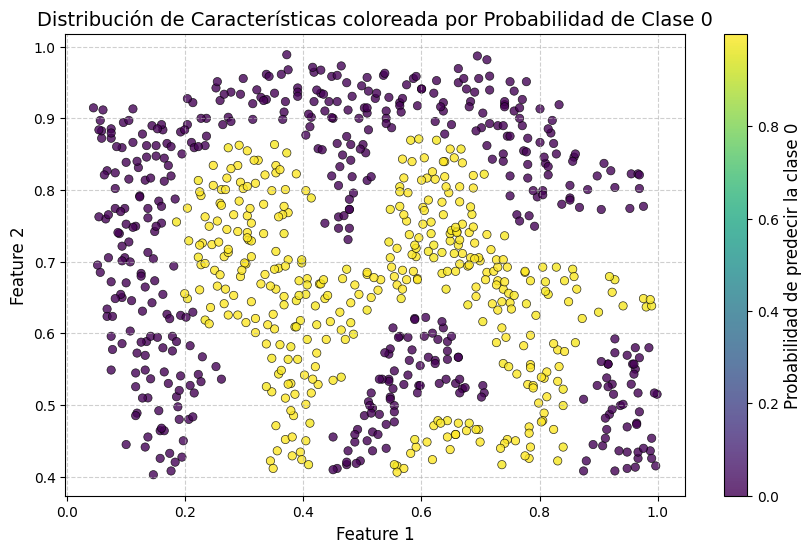

In [139]:
# 1. Extraer la probabilidad de la clase 0
# La primera columna de 'prob' corresponde a P(y=0)
prob_0 = prob[:, 0] #todos los elementos de la columna 0

# 2. Generar el Scatter Plot
plt.figure(figsize=(10, 6))

# c: El color, que es la probabilidad de 0 (prob_0)

scatter = plt.scatter(
    x=X_2["Feature 1"],
    y=X_2["Feature 2"],
    c=prob_0,
    cmap='viridis', 
    alpha=0.8,
    edgecolors='k',
    linewidths=0.5
)

# 3. Añadir la barra de color (Colorbar)
cbar = plt.colorbar(scatter)
cbar.set_label('Probabilidad de predecir la clase 0', fontsize=12)

# 4. Configurar etiquetas y título
plt.title('Distribución de Características coloreada por Probabilidad de Clase 0', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() 

#### Grid search

In [140]:
param_grid = {
    # El parámetro C (penalización)
    # Rango: [0.01, 0.1, 1, 10, 100]
    'svc__C': np.logspace(-2, 2, 5).tolist(),
    # El parámetro gamma (influencia del kernel RBF)
    'svc__gamma': np.logspace(-3, 1, 5).tolist(),
    'svc__kernel': ['rbf', 'linear']
}

In [141]:
grid_search = GridSearchCV(
    estimator=modelo2,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2 # Muestra información detallada durante el proceso
    
)

In [142]:
grid_search.fit(X_2, y_2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=0.01, svc__gamma=0.01, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.01, svc__gamma=0.01, sv

,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svc__C': [0.01, 0.1, ...], 'svc__gamma': [0.001, 0.01, ...], 'svc__kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [143]:
print("\n--- Resultados ---")
print(f"Mejor Score (validación cruzada): {grid_search.best_score_:.4f}")
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

# El mejor modelo (el estimador final)
mejor_modelo = grid_search.best_estimator_


--- Resultados ---
Mejor Score (validación cruzada): 0.8757
Mejores Hiperparámetros encontrados:
{'svc__C': 10.0, 'svc__gamma': 10.0, 'svc__kernel': 'rbf'}
